## Introducción al Aprendizaje Automático, Modulo 1:  Una simple tarea de clasificación

### Importar modulos requeridos y cargar archivo de datos

In [14]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms

frutas = pd.read_table('frutas_con_colores.txt')

In [3]:
frutas.head(20)

,etiqueta_fruta,nombre_fruta,subtipo_fruta,masa,ancho,alto,color
0,1,manzana,manzana_verde,192,8.4,7.3,0.55
1,1,manzana,manzana_verde,180,8.0,6.8,0.59
2,1,manzana,manzana_verde,176,7.4,7.2,0.60
3,2,mandarina,mandarina,86,6.2,4.7,0.80
4,2,mandarina,mandarina,84,6.0,4.6,0.79
5,2,mandarina,mandarina,80,5.8,4.3,0.77
6,2,mandarina,mandarina,80,5.9,4.3,0.81
7,2,mandarina,mandarina,76,5.8,4.0,0.81
8,1,manzana,braeburn,178,7.1,7.8,0.92
9,1,manzana,braeburn,172,7.4,7.0,0.89


In [4]:
frutas.shape

(59, 7)

In [5]:
# creamos un mapeo entre los valores de las etiquetas de frutas y los nombres de frutas para 
# hacer los resultados mas fáciles de interpretar
busca_nombre_fruta = dict(zip(frutas.etiqueta_fruta.unique(), frutas.nombre_fruta.unique()))   
busca_nombre_fruta

{1: 'manzana', 2: 'mandarina', 3: 'naranja', 4: 'limon'}

El archivo contiene la masa, el alto y ancho de una selección de naranjas, limones y manzanas. Las alturas se midieron a lo largo del núcleo de la fruta. Las anchuras son la mayor anchura perpendicular a la altura.

### Examinando los datos

(59, 4) (59,)
(44, 4) (15, 4)


<IPython.core.display.Javascript object>


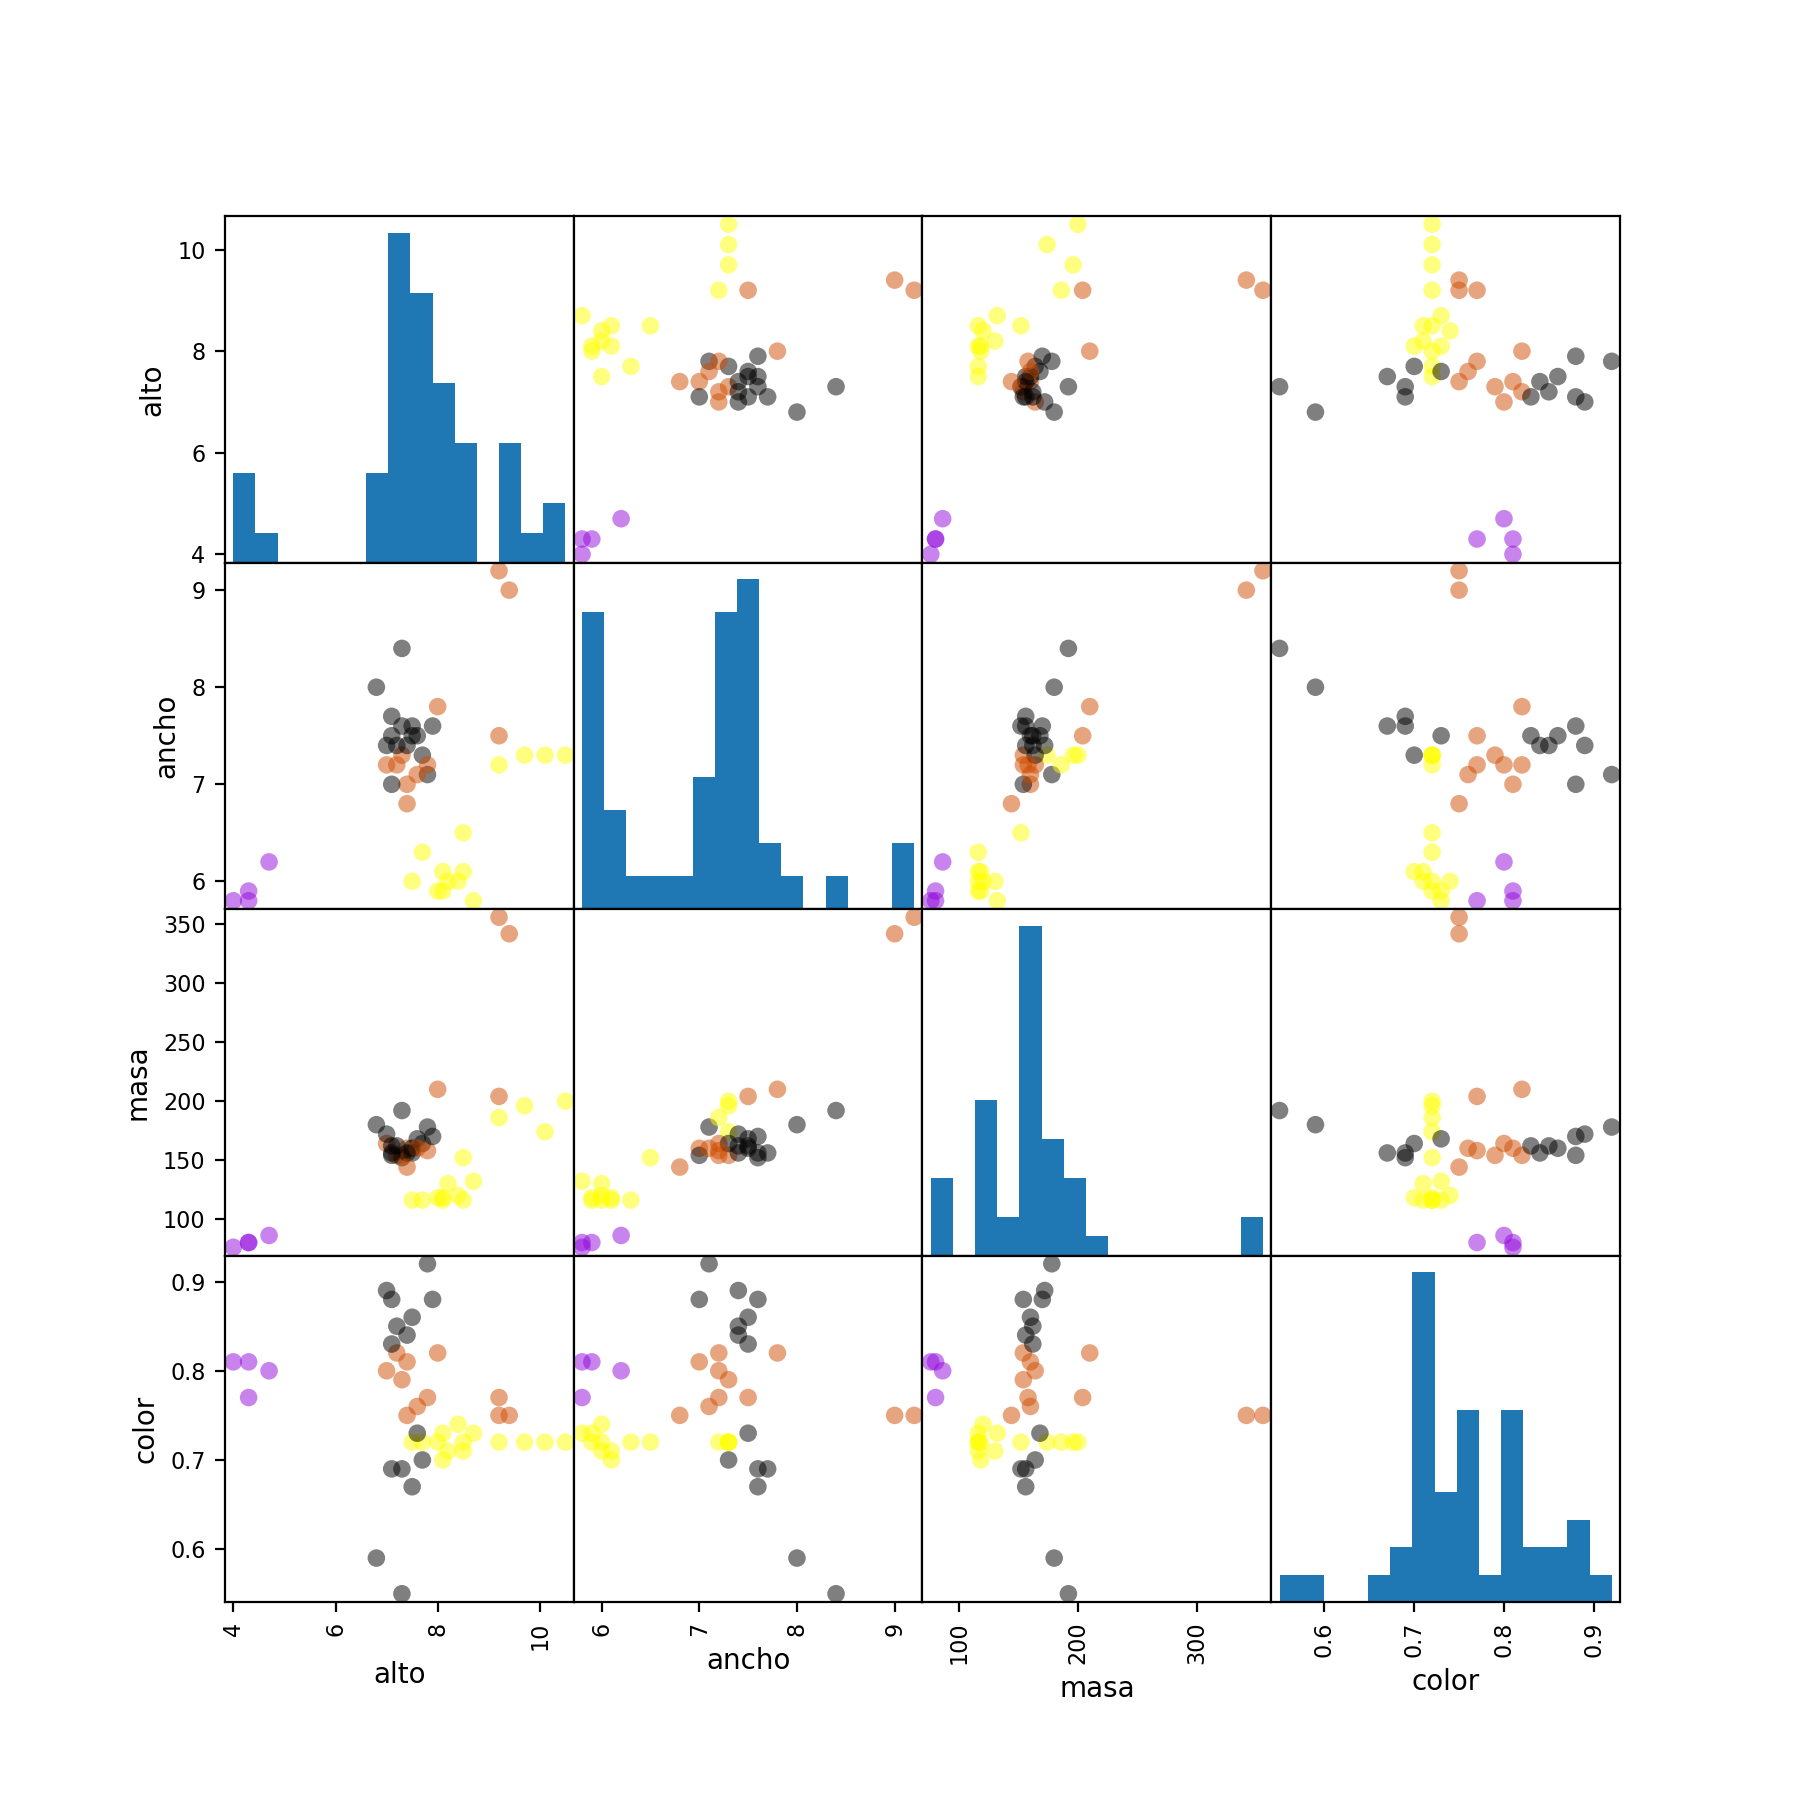

In [6]:
# grficando una matriz de dispersión
from matplotlib import cm

X = frutas[['alto', 'ancho', 'masa', 'color']]
y = frutas['etiqueta_fruta']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print (X.shape, y.shape)
print (X_train.shape, X_test.shape)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>


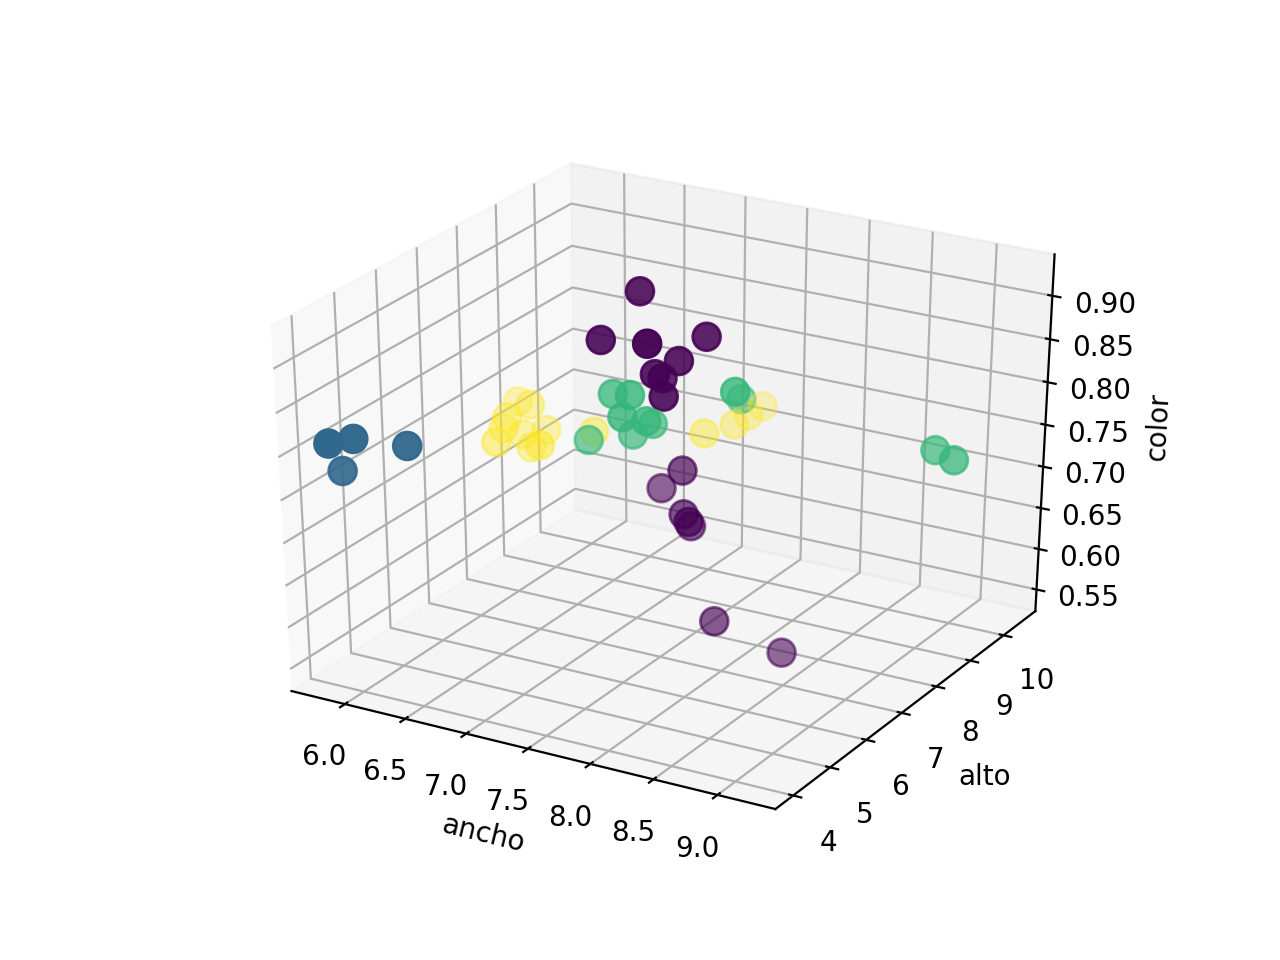

In [8]:
# graficando un diagrama de dispersión en 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['ancho'], X_train['alto'], X_train['color'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('ancho')
ax.set_ylabel('alto')
ax.set_zlabel('color')
plt.show()

### Crear divisiones de entrenamiento y prueba

In [7]:
# Para este ejemplo, usamos la masa, el ancho y el alto como características de cada instancia de frutas
X = frutas[['masa', 'ancho', 'alto']]
y = frutas['etiqueta_fruta']

# la división de entrenamiento-prueba por defecto es 75% / 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Crear el objeto clasificador

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Entrenar el clasificador usando el conjunto de entrenamiento

In [9]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Estimar la exactitud del clasificador sobre datos nuevos, usando el conjunto de prueba

In [10]:
score=knn.score(X_test, y_test)
prediction=knn.predict(X_test)
print (score)
print (prediction)

print (X_train.shape)


0.5333333333333333
[3 1 4 4 1 1 3 3 1 4 2 1 3 1 4]
(44, 3)


### Usar el modelo de clasificación k-NN entrenanado para clasificar objetos nuevos, no vistos previamente

In [11]:
# primer ejemplo: una futa pequeña con masa 20g, ancho 4.3 cm, alto 5.5 cm
data=np.asarray([[20, 4.3, 5.5]])
print (data.shape)
prediccion_fruta = knn.predict(data)
busca_nombre_fruta[prediccion_fruta[0]]

(1, 3)


'mandarina'

In [12]:
# segundo ejemplo: una fruta alargada con masa 100g, ancho 6.3 cm, alto 8.5 cm
prediccion_fruta = knn.predict([[100, 6.3, 8.5]])
busca_nombre_fruta[prediccion_fruta[0]]

'limon'

### Graficar los límites de decisión del clasificador k-NN

In [15]:
from utilitarios import plot_knn_frutas
plot_knn_frutas(X_train, y_train, 1, 'distance')   # elegimos 1 vecinos mas cercanos
plot_knn_frutas(X_train, y_train, 5, 'distance')   # elegimos 5 vecinos mas cercanos
plot_knn_frutas(X_train, y_train, 10, 'distance')   # elegimos 10 vecinos mas cercanos

/Users/macbook/Dropbox/Docencia/InteligenciaArtificial/presentaciones/practicas/utilitarios.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_mat = X[['alto', 'ancho']].as_matrix()
/Users/macbook/Dropbox/Docencia/InteligenciaArtificial/presentaciones/practicas/utilitarios.py:34: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_mat = y.as_matrix()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Que tan sensible es la exactitud del clasificador k-NN a la elección del parámetro 'k'?

<IPython.core.display.Javascript object>


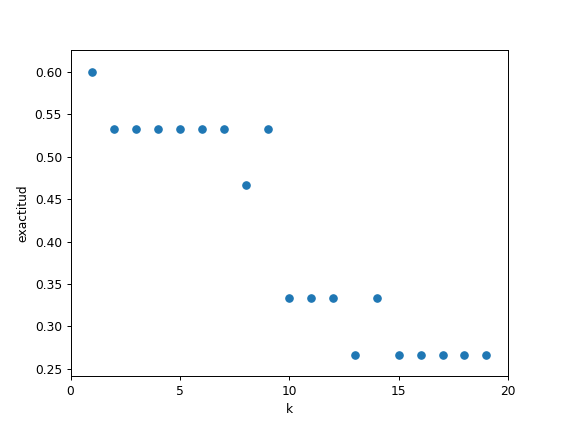

In [17]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('exactitud')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### Que tan sensible es la exactitud del clasificador k-NN a la proporción de la división entrenamiento/prueba?

<IPython.core.display.Javascript object>


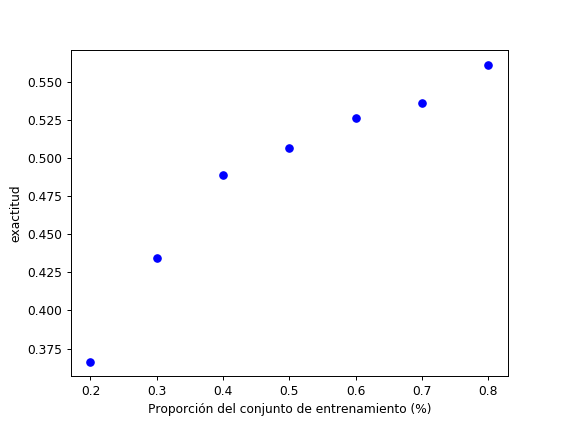

In [18]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:
    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel(u'Proporción del conjunto de entrenamiento (%)')
plt.ylabel('exactitud');